# Project natual language processing

Group members:
- Mazen TEBIB
- Khang Duy LAI

## 1. Import libraries and dataset

Import necessary libraries for the notebook

In [202]:
import pandas as pd
import numpy as np
import re
from sklearn import preprocessing
from sklearn.metrics import precision_score, f1_score, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, SpatialDropout1D, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer

Read the dataset.

In [203]:
df = pd.read_csv('data/news_dataset.csv')

In [204]:
print(df)
print('--------')
print(df.count())
print('--------')
print(df['category'].value_counts())

           category                                               text
0              tech  tv future in the hands of viewers with home th...
1          business  worldcom boss  left books alone  former worldc...
2             sport  tigers wary of farrell  gamble  leicester say ...
3             sport  yeading face newcastle in fa cup premiership s...
4     entertainment  ocean s twelve raids box office ocean s twelve...
...             ...                                                ...
2220       business  cars pull down us retail figures us retail sal...
2221       politics  kilroy unveils immigration policy ex-chatshow ...
2222  entertainment  rem announce new glasgow concert us band rem h...
2223       politics  how political squabbles snowball it s become c...
2224          sport  souness delight at euro progress boss graeme s...

[2225 rows x 2 columns]
--------
category    2225
text        2225
dtype: int64
--------
sport            511
business         510
politics        

## 2. Data cleaning

Write clean text function, remove stopwords, puctual etc

In [205]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """
    Clean the input text 
    """
    cleaned_text = text.lower()
    #cleaned_text =  re.sub(r'^https?:\/\/.*[\r\n]*', '', cleaned_text)
    cleaned_text = re.sub('<.*>', '', cleaned_text)
    cleaned_text = re.sub('[^a-zA-Z0-9\s]', '', cleaned_text)  # Remove any characters that are not alphanumeric or whitespace
    cleaned_text = cleaned_text.split()
    cleaned_text = [word for word in cleaned_text if word not in stopwords and len(word) > 1] # Remove any stop words or one-character words from the text
    cleaned_text = [lemmatizer.lemmatize(w) for w in cleaned_text]
    
    return " ".join(cleaned_text)

df.text[10]

'berlin cheers for anti-nazi film a german movie about an anti-nazi resistance heroine has drawn loud applause at berlin film festival.  sophie scholl - the final days portrays the final days of the member of the white rose movement. scholl  21  was arrested and beheaded with her brother  hans  in 1943 for distributing leaflets condemning the  abhorrent tyranny  of adolf hitler. director marc rothemund said:  i have a feeling of responsibility to keep the legacy of the scholls going.   we must somehow keep their ideas alive   he added.  the film drew on transcripts of gestapo interrogations and scholl s trial preserved in the archive of communist east germany s secret police. their discovery was the inspiration behind the film for rothemund  who worked closely with surviving relatives  including one of scholl s sisters  to ensure historical accuracy on the film. scholl and other members of the white rose resistance group first started distributing anti-nazi leaflets in the summer of 19

Apply to all row by using lambda function

In [206]:
df['cleaned_text'] = df['text'].apply(lambda x: clean_text(x))

Print out an example.

In [207]:
df['cleaned_text'][10]

'berlin cheer antinazi film german movie antinazi resistance heroine drawn loud applause berlin film festival sophie scholl final day portrays final day member white rose movement scholl 21 arrested beheaded brother han 1943 distributing leaflet condemning abhorrent tyranny adolf hitler director marc rothemund said feeling responsibility keep legacy scholls going must somehow keep idea alive added film drew transcript gestapo interrogation scholl trial preserved archive communist east germany secret police discovery inspiration behind film rothemund worked closely surviving relative including one scholl sister ensure historical accuracy film scholl member white rose resistance group first started distributing antinazi leaflet summer 1942 arrested dropped leaflet munich university calling day reckoning adolf hitler regime film focus six day scholl arrest intense trial saw scholl initially deny charge ended defiant appearance one three german film vying top prize festival south african f

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

Separate X and y from the dataframe.

In [209]:
X = df['cleaned_text'].values.tolist() 
y = df['category'].values.tolist()

### Train test split

Use BOW and TFIDF method to vectorize the word

- BOW

convert X into BOW vertors.

In [152]:
cv = CountVectorizer(stop_words='english')
cv_X = cv.fit_transform(X)
# cv_X = cv.fit_transform(X_t)

Split train and test set.

In [153]:
cv_X_train, cv_X_test, cv_y_train, cv_y_test = train_test_split(cv_X, y, test_size=0.3, random_state=42)

- TF-IDF

Convert the text into vector, format TF IDF.

In [154]:
tf = TfidfVectorizer(stop_words='english')
tf_X = tf.fit_transform(X)
# tf_X = tf.fit_transform(X_test)

In [155]:
tf_X_train, tf_X_test, tf_y_train, tf_y_test = train_test_split(tf_X, y, test_size=0.3, random_state=42)

- BERT

Bert tokenizer

In [156]:
from transformers import TFBertForSequenceClassification
from transformers import BertTokenizer
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 5)
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [157]:
bert_X = []
for text in X:
    text = bert_tokenizer.tokenize(text)
    # tokens = bert_tokenizer.tokenize(text)
    # text = bert_tokenizer.convert_tokens_to_ids(tokens)
    bert_X.append(text)

- Skipgram

Convert text to vector using skipgram.

In [158]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
from gensim.utils import simple_preprocess
import gensim

In [159]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [160]:
words = []
labels = []
for rev,label in zip(df.cleaned_text.values.tolist(), df.category.values.tolist()):
    sent_rev = sent_tokenize(rev)
    for word in sent_rev:
        words.append(simple_preprocess(word))
        labels.append(label)

In [161]:
model_w2v_sg = gensim.models.Word2Vec(words, window = 5,sg=1, min_count = 1)

In [162]:
model_w2v_sg.corpus_count

2225

In [163]:
def review_embeddings(review,model_w2v, method:str = 'avg'):
    """ 
    Return the Text vector using the average or sum of word embeddings given by Word2Vec
    """
    if method == 'avg':
        return np.mean([model_w2v.wv[word] for word in review if word in model_w2v.wv.index_to_key], axis = 0)
    return np.sum([model_w2v.wv[word] for word in review if word in model_w2v.wv.index_to_key], axis = 0)

In [164]:
X_news = [review_embeddings(news,model_w2v_sg) for news in words]
X_news = np.array(X_news)

In [165]:
le = preprocessing.LabelEncoder()
y_news = le.fit_transform(df.category)

In [166]:
Xsg_train, Xsg_test, ysg_train, ysg_test = train_test_split(X_news, y_news, test_size =0.2, random_state=42)

- CBOW

Convert text to vector using CBOW method.

In [167]:
model_w2v_cbow = gensim.models.Word2Vec(words, window = 5, min_count = 1)

In [168]:
X_news = [review_embeddings(news,model_w2v_cbow) for news in words]
X_news = np.array(X_news)

In [169]:
Xcbow_train, Xcbow_test, ycbow_train, ycbow_test = train_test_split(X_news, y_news, test_size =0.2, random_state=42)

- Encode the label Y, from text to number.

In [170]:
le = preprocessing.LabelEncoder()
le.fit(df.category.unique())

LabelEncoder()

In [171]:
le.classes_

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [172]:
cv_y_train_category = le.fit_transform(cv_y_train)
cv_y_test_category = le.fit_transform(cv_y_test)

In [173]:
tf_y_train_category = le.fit_transform(cv_y_train)
tf_y_test_category = le.fit_transform(cv_y_test)

## 3. Training and validation

Train the model using logistic regression.

### Logistic regression with BOW

In [174]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='multinomial')
bow_lr = lr.fit(cv_X_train, cv_y_train_category)
print(bow_lr)
# print(cv_X_train.shape)
# print(y_train_category.shape)

LogisticRegression(multi_class='multinomial')


In [175]:
bow_test_predictions = bow_lr.predict(cv_X_test)

Result of BOW with Logistic regression:

- Accuracy score
- Precision score
- F1 score

In [176]:
print(accuracy_score(cv_y_test_category, bow_test_predictions))

0.9625748502994012


In [177]:
print(precision_score(cv_y_test_category, bow_test_predictions, average=None))

[0.93373494 0.96428571 0.94736842 0.99319728 0.97674419]


In [178]:
print(f1_score(cv_y_test_category, bow_test_predictions, average=None))

[0.93939394 0.96       0.95154185 0.99658703 0.96551724]


### Logistic regression with TF-IDF

In [179]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='multinomial')
tfidf_lr = lr.fit(tf_X_train, tf_y_train_category)
print(lr)

LogisticRegression(multi_class='multinomial')


In [180]:
tfidf_test_predictions = tfidf_lr.predict(tf_X_test)

Result of TFIDF with Logistic regression:

- Accuracy score
- Precision score
- F1 score

In [181]:
print(accuracy_score(tf_y_test_category, tfidf_test_predictions))

0.9745508982035929


In [182]:
print(precision_score(tf_y_test_category, tfidf_test_predictions, average=None))

[0.95757576 1.         0.94736842 0.97986577 0.99230769]


In [183]:
print(f1_score(tf_y_test_category, tfidf_test_predictions, average=None))

[0.96048632 0.98654709 0.95154185 0.98983051 0.98473282]


### Logistic regression with Word2vec skipgram

In [184]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='multinomial')
word2vec_lr = lr.fit(Xsg_train, ysg_train)

/Users/laiduy98/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [185]:
word2vec_test_predictions = word2vec_lr.predict(Xsg_test)

Result of Skipgram with Logistic regression:

- Accuracy score
- Precision score
- F1 score

In [186]:
accuracy_score(word2vec_test_predictions,ysg_test)

0.9685393258426966

In [187]:
print(precision_score(word2vec_test_predictions, ysg_test, average=None))

[0.94059406 0.95061728 0.97590361 0.97959184 1.        ]


In [ ]:
print(f1_score(word2vec_test_predictions, ysg_test, average=None))

### Logistic regression with Word2vec CBOW

In [188]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='multinomial')
word2vec_lr = lr.fit(Xcbow_train, ycbow_train)

/Users/laiduy98/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [189]:
word2vec_test_predictions = word2vec_lr.predict(Xcbow_test)

Result of CBOW with Logistic regression:

- Accuracy score
- Precision score
- F1 score

In [190]:
accuracy_score(word2vec_test_predictions,ycbow_test)

0.9370786516853933

In [191]:
print(precision_score(word2vec_test_predictions, ycbow_test, average=None))

[0.92079208 0.92592593 0.93975904 0.95918367 0.93902439]


### LSTM

In [192]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['cleaned_text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 29600 unique tokens.


In [193]:
X = tokenizer.texts_to_sequences(df['cleaned_text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (2225, 250)


In [194]:
y = pd.get_dummies(df['category']).values
print('Shape of label tensor:', y.shape)

Shape of label tensor: (2225, 5)


In [195]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.10, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2002, 250) (2002, 5)
(223, 250) (223, 5)


In [196]:
X_train

array([[  961,  4374, 22542, ...,   294,   215,  8362],
       [    0,     0,     0, ...,   197,  1435,   909],
       [    0,     0,     0, ...,  5690,   355, 23606],
       ...,
       [  190,   233,    33, ...,   210,    59,   147],
       [ 2291,   661,  7987, ...,  5406, 17430,  6577],
       [    0,     0,     0, ...,   443,   528,  5795]], dtype=int32)

In [197]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
29/29 [==============================] - 16s 444ms/step - loss: 1.5869 - accuracy: 0.2615 - val_loss: 1.3577 - val_accuracy: 0.4328
Epoch 2/5
29/29 [==============================] - 12s 414ms/step - loss: 1.1674 - accuracy: 0.6669 - val_loss: 0.8130 - val_accuracy: 0.8109
Epoch 3/5
29/29 [==============================] - 13s 437ms/step - loss: 0.7085 - accuracy: 0.9128 - val_loss: 0.5797 - val_accuracy: 0.8607
Epoch 4/5
29/29 [==============================] - 13s 448ms/step - loss: 0.4922 - accuracy: 0.8984 - val_loss: 0.4537 - val_accuracy: 0.8607
Epoch 5/5
29/29 [==============================] - 15s 511ms/step - loss: 0.5488 - accuracy: 0.8140 - val_loss: 1.4379 - val_accuracy: 0.5025


In [198]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

7/7 [==============================] - 1s 60ms/step - loss: 1.4661 - accuracy: 0.4978
Test set
  Loss: 1.466
  Accuracy: 0.498


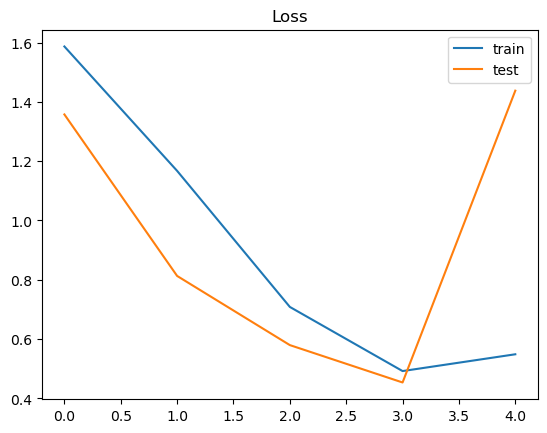

In [199]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

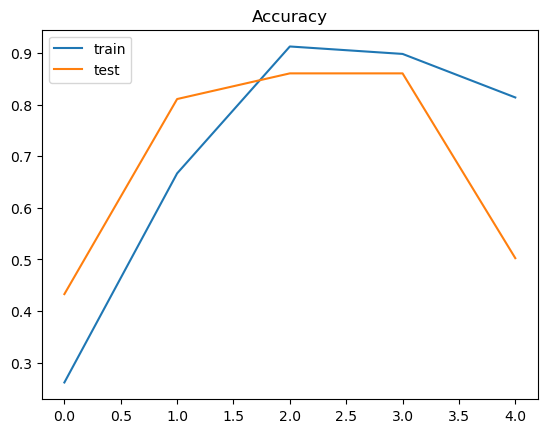

In [200]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

### BERT

In [235]:
X = df["text"]
y = df["category"]

# Encode the labels
le = preprocessing.LabelEncoder()
le.fit(df.category.unique())

print(le.classes_)

y_labels = le.fit_transform(y)

X_train_text, X_test_text, y_train, y_test = train_test_split(X, y_labels, test_size =0.2, random_state=42)

bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case=True)

def convert_example_to_feature(text):
  return bert_tokenizer.encode_plus(text, 
                add_special_tokens = True,     # add [CLS], [SEP]
                max_length = 512,              # max length of the text that can go to BERT
                padding='max_length',
                truncation=True,
                return_attention_mask = True,  # add attention mask to not focus on pad tokens
              )
# map to the expected input to TFBertForSequenceClassification
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }, label

def encode_examples(ds):
  # prepare list, so that we can build up final TensorFlow dataset from slices.
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
  for text, label in ds:
    bert_input = convert_example_to_feature(text)
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])

  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

batch_size = 8

ds_train = zip(X_train_text, y_train)
ds_test = zip(X_test_text, y_test)
ds_train_encoded = encode_examples(ds_train).shuffle(len(X_train_text)).batch(batch_size)
ds_test_encoded = encode_examples(ds_test).batch(batch_size)

bert_model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased",  num_labels=5)

# recommended learning rate for Adam 5e-5, 3e-5, 2e-5
learning_rate = 2e-5
# multiple epochs might be better as long as we will not overfit the model
number_of_epochs = 4

# choosing Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)
# we do not have one-hot vectors, we can use sparce categorical cross entropy and accuracy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

bert_model.compile(loss=loss,
                   optimizer=optimizer,
                   metrics=metric)


history = bert_model.fit(ds_train_encoded,
                         batch_size=batch_size,
                         epochs=number_of_epochs,
                         validation_data=ds_test_encoded)

['business' 'entertainment' 'politics' 'sport' 'tech']


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
  2/223 [..............................] - ETA: 2:14:39 - loss: 1.6988 - accuracy: 0.1250

KeyboardInterrupt: 

**model couldn't finish training it was taking more than 2 hours and without finishing**

## LDA

Using LDA try to do the topic modeling without knowing the label.

In [117]:
from sklearn.decomposition import LatentDirichletAllocation

In [118]:
K = 5

Using BOW method before apply LDA

In [119]:
cv = CountVectorizer(stop_words='english', max_features=100000)
bow_matrix = cv.fit_transform(df.cleaned_text.values.tolist())

Using TFIDF befor apply LDA

In [120]:
tf = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=500)
tf_matrix = tf.fit_transform(df.cleaned_text.values.tolist())

In [121]:
lda = LatentDirichletAllocation(n_components= K )

Apply LDA with TFIDF

In [122]:
lda_bow_matrix = lda.fit_transform(tf_matrix)

In [123]:
document_topic = lda_bow_matrix.argmax(axis = 1).tolist()

In [124]:
from collections import Counter

See if the number of topic is balance or imbalance

In [125]:
Counter(document_topic)

Counter({1: 559, 0: 459, 2: 583, 4: 294, 3: 330})

In [126]:
topic_words = {}
n_top_words = 50
vocab  = tf.get_feature_names()
for topic, comp in enumerate(lda.components_):
    # for the n-dimensional array "arr":
    # argsort() returns a ranked n-dimensional array of arr, call it "ranked_array"
    # which contains the indices that would sort arr in a descending fashion
    # for the ith element in ranked_array, ranked_array[i] represents the index of the
    # element in arr that should be at the ith index in ranked_array
    # ex. arr = [3,7,1,0,3,6]
    # np.argsort(arr) -> [3, 2, 0, 4, 5, 1]
    # word_idx contains the indices in "topic" of the top num_top_words most relevant
    # to a given topic ... it is sorted ascending to begin with and then reversed (desc. now)    
    word_idx = np.argsort(comp)[::-1][:n_top_words]

    # store the words most relevant to the topic
    topic_words[topic] = [vocab[i] for i in word_idx]

/Users/laiduy98/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Display which word is the most use in each topic.

In [127]:
for topic, words in topic_words.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  mr, uk, people, told, say, new, year, time, added, make, way, week, month, number, like, world, set, company
Topic: 1
  people, like, say, make, way, new, time, told, added, year, world, number, set, uk, mr, month, company, week
Topic: 2
  year, world, time, added, number, new, make, month, told, uk, like, way, say, week, people, set, mr, company
Topic: 3
  company, month, year, new, say, uk, mr, week, make, time, added, number, told, world, way, people, like, set
Topic: 4
  set, week, new, year, number, time, world, month, uk, added, make, way, like, told, say, people, company, mr


## Visualisation

In [130]:
from wordcloud import WordCloud, STOPWORDS

In [131]:
# Print the most similar words/phrases to the current category according to the word2vec model (using skip-gram method)
for category in df['category'].unique():
    print(category)
    print(model_w2v_sg.wv.most_similar(category))
    print('---------------')

tech
[('freely', 0.9806053042411804), ('electricity', 0.9747734069824219), ('discount', 0.9716087579727173), ('relies', 0.970242977142334), ('resell', 0.9695195555686951), ('clamp', 0.9689363837242126), ('cleaning', 0.9687482714653015), ('operate', 0.9684348106384277), ('intellectual', 0.9681331515312195), ('ripping', 0.966178297996521)]
---------------
business
[('profitable', 0.8607794642448425), ('infrastructure', 0.852055013179779), ('consolidation', 0.8421344757080078), ('broker', 0.8402656316757202), ('manufacturer', 0.8389089703559875), ('reflecting', 0.838534951210022), ('convinced', 0.8371285796165466), ('property', 0.8359319567680359), ('delivery', 0.8356852531433105), ('significant', 0.8344925045967102)]
---------------
sport
[('cruel', 0.8253242373466492), ('spanish', 0.8213930130004883), ('regular', 0.8213035464286804), ('understands', 0.8175345659255981), ('sportsweek', 0.8156406283378601), ('hear', 0.7938847541809082), ('rinaldi', 0.7933927774429321), ('antidoping', 0.78

In [ ]:
# Define a function to convert a list of texts into a dictionary of word counts
def texts_to_dict(texts):
    word_count = {}
    for news in texts:
        splitted_text = news.split()
        for word in splitted_text:
            if word not in word_count:
                word_count[word] = 1
            else:
                word_count[word]+=1
    return word_count
   #texts =  df.text.values.tolist()

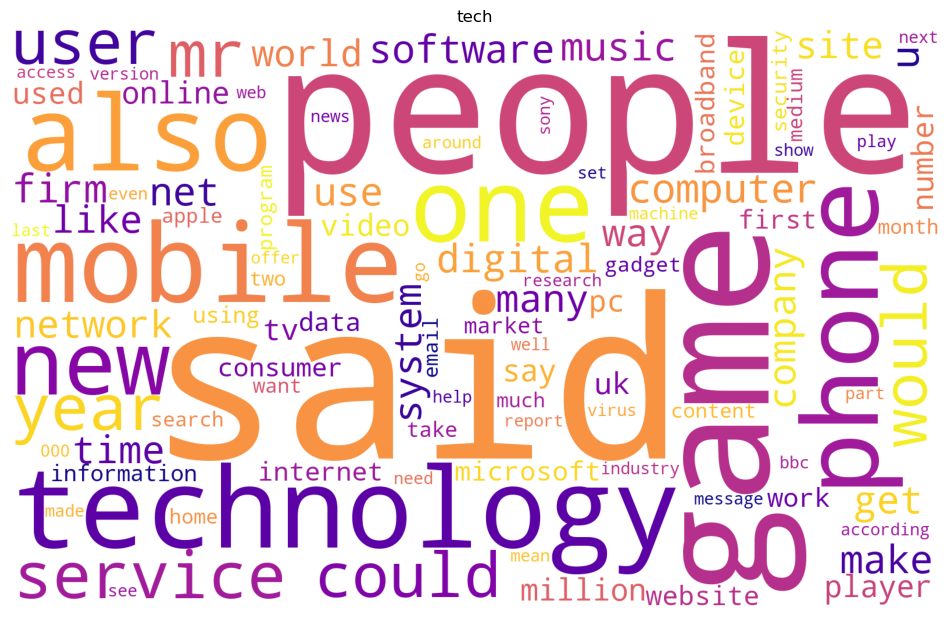

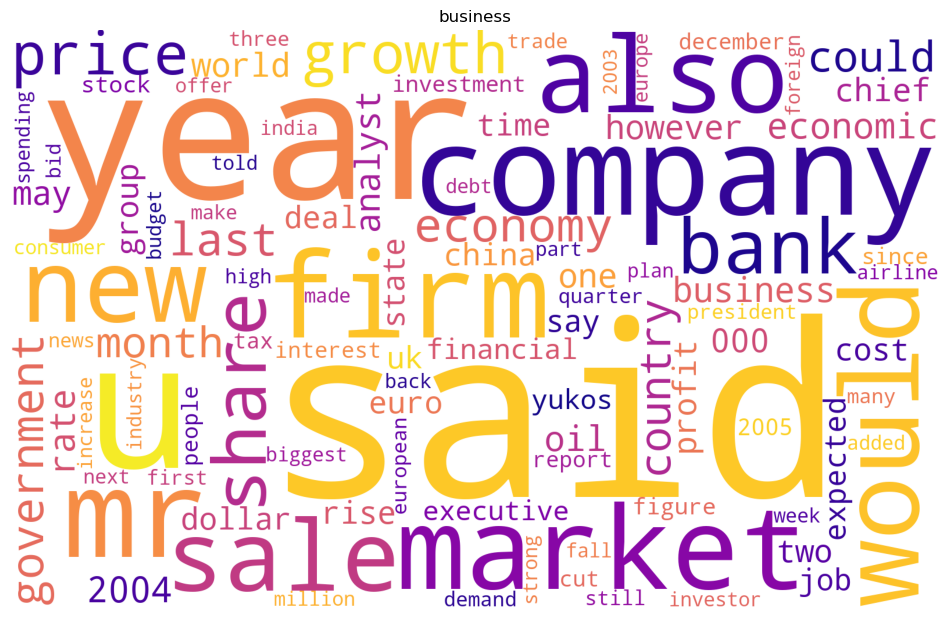

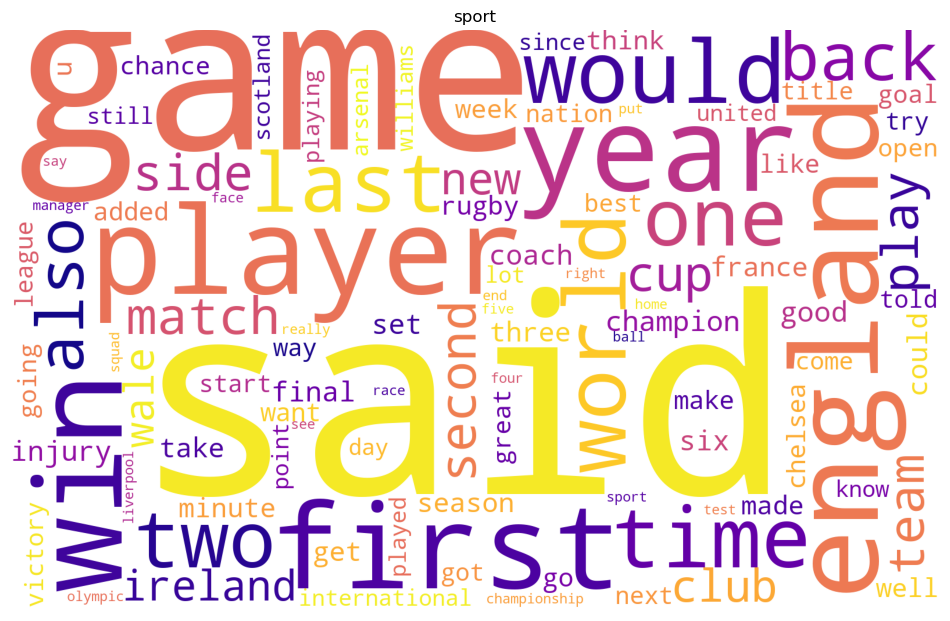

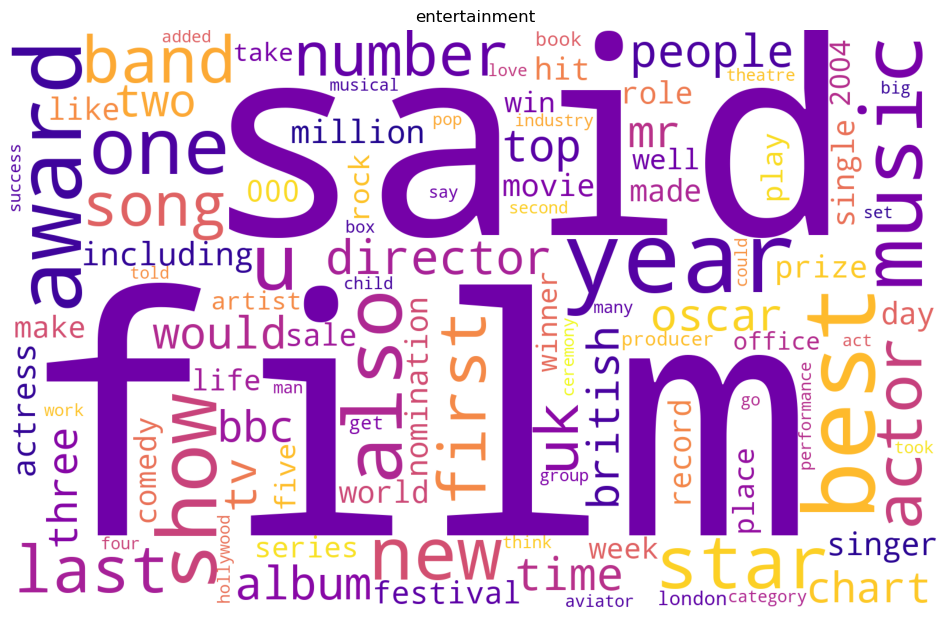

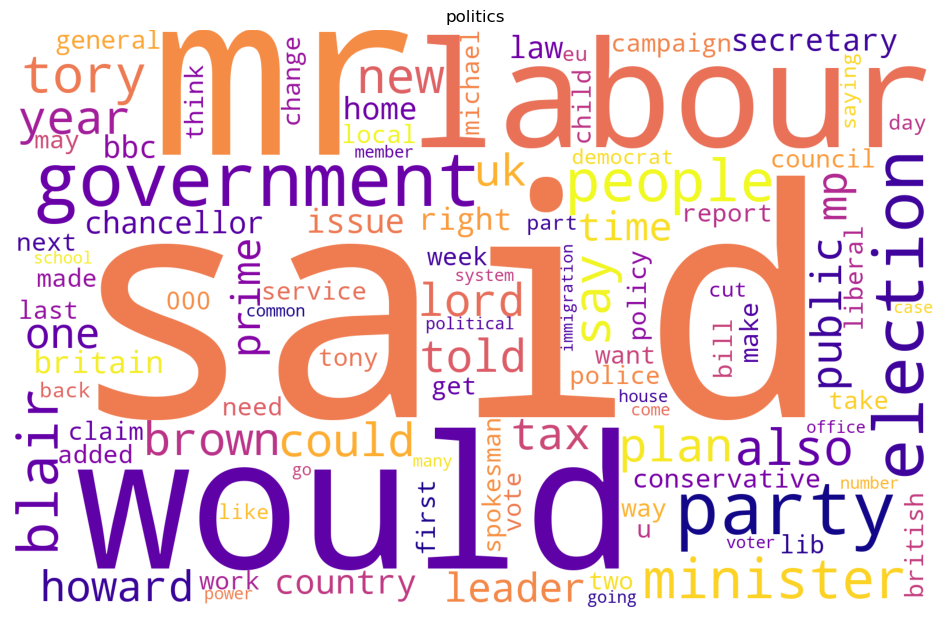

In [133]:
%matplotlib inline
# Loop over each unique category in the DataFrame, and enumerate the categories
for c, category in enumerate(df.category.unique()):
    df_category = df[df['category'] == category]
    word_count_per_category = texts_to_dict(df_category.cleaned_text.values.tolist())
    wc = WordCloud(min_font_size=10,
               height=1000,
               width=1600,
               background_color='white',
               contour_color='black',
               colormap='plasma',
               max_words=100, relative_scaling=0.5, normalize_plurals=False).generate_from_frequencies(word_count_per_category)
    plt.figure(figsize=(12,12))
    plt.imshow(wc)
    plt.axis("off")
    plt.title(category)
    plt.show()

(-0.5, 1599.5, 599.5, -0.5)

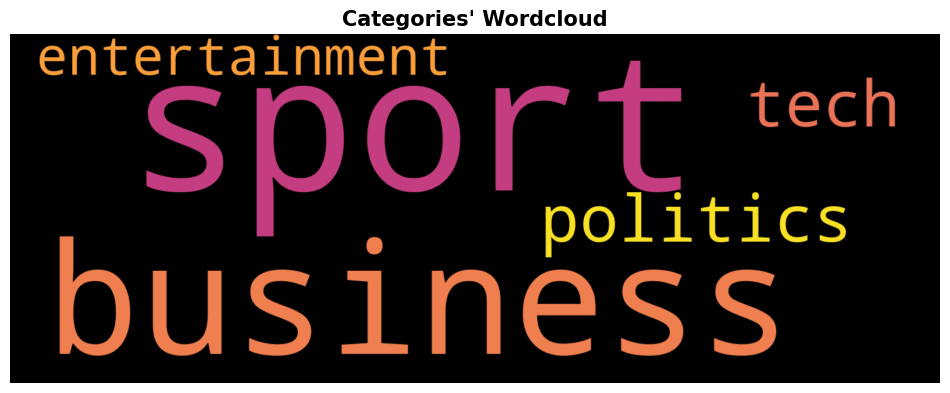

In [134]:
plt.figure(figsize=(12,12))
wc = WordCloud(max_words=1000, 
               min_font_size=10,
               height=600,
               width=1600,
               background_color='black',
               contour_color='black',
               colormap='plasma',
               repeat=False,
               stopwords=STOPWORDS).generate(' '.join(df.category))

plt.title("Categories' Wordcloud", size=15, weight='bold')
plt.imshow(wc, interpolation= "bilinear")
plt.axis('off')

In [135]:
import plotly.express as px

In [136]:
df_category_count = df.groupby('category').count().reset_index()
px.pie(df_category_count, names='category', values='text', title='% of news per category', color_discrete_sequence=px.colors.sequential.Blues)